# DAV 6150 Module 2 Assignment-Cross Validation


Zhihong Zhang

## Introduction## 
The module is aiming to develop insights and analysis of a combined cycle power plant data set. As the first module of the class, I need to  construct a cross validated linear regression model that predicts the energy production of a power plant. The general method I plan to do is to do a exploratory data analysis to decide good indicator of response variable. And Based on the this result, then decided to build linear regression model and using K fold validation to test accuracy.

## Data to be Used ##
The initial data set that was used for this research comes from the  UCI repository https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#. The data set is a csv format file which can be easily loaded into Python by utilizing the pandas package.  The data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load., and it is used to generate the observable pattern and visualizations. 


## Part 1 Data Acquisition: ##

In [101]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

#reads data from the original source, since first row is column name,also add header. 
plant = pd.read_csv("https://raw.githubusercontent.com/steinszzh/DAV6150/master/m2hw/M2_Data.csv")

# data set check - make sure data was read in as expected
plant.head() 

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Data preparation: ###

Based on attributes information from UCI, the attributes are showed as follows
Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 

The first thing to do is to check the null value and if there exist null value, replace or drop missing data. 

In [102]:
# how many observations are contained within the example data set?
len(plant)

9568

In [103]:
#check whether there is none value
plant['T'].isnull().sum()

0

In [104]:
# similarly, check other columns
#run other four,but only show code of last one
#plant['V'].isnull().sum()
#plant['AP'].isnull().sum()
#plant['RH'].isnull().sum()
plant['EP'].isnull().sum()

0

based on these results, there is no null values, and null value check passed.




### Renaming the column based on UCI repostitory 

Since original name is abstract, and we then need to rename the column to give a meaningful title based on UCI repository. 

In [105]:
# rename the column
plant.rename(columns={'T':'Temperature', 'V':'Exhaust_Vacuum','AP':'Ambient_Pressure' ,'RH':'Relative_Humidity','EP':'Energy_output'}, inplace=True)
plant.head()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


After getting raw data preparation,we can then launch EDA.

## Part 2 Exporatory data analysis (EDA): ##

Firstly I start with general statistiics of data set. 

In [108]:
#start with overview of data set
plant.describe()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


making box plot firstly for a simple check of reponse variable- Energy output. 

Text(0.5, 1.0, 'Electricity Energy Output  Boxplot ')

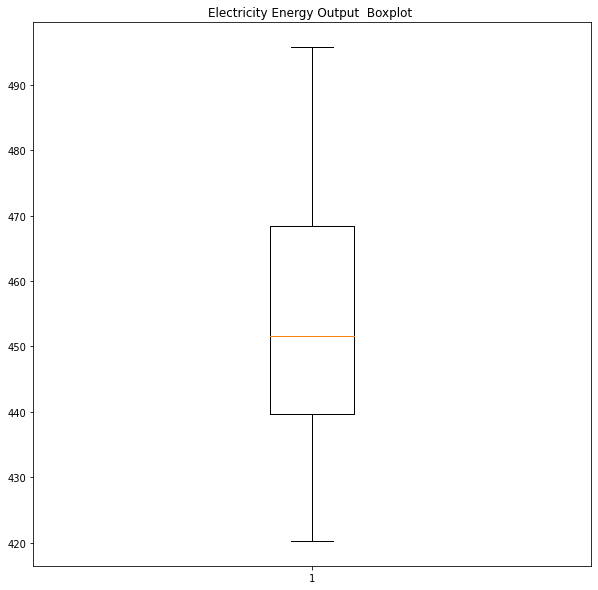

In [110]:

# make boxplot  
# define some attributes
plant_t = plant['Temperature']
plant_ev = plant['Exhaust_Vacuum']
plant_ap = plant['Ambient_Pressure']
plant_rh = plant['Relative_Humidity']
plant_eo = plant['Energy_output']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:

# Matplotlib boxplot  
plt.boxplot(x=plant_eo)

# give the plot a title
plt.title('Electricity Energy Output  Boxplot ')



To get a nice overview of other four attributes, plotting multi histogram is much efficient to go.

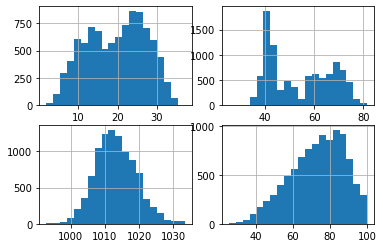

In [111]:
#histogram for all four explantory variable,qucick check count 
#plot temperature histogram
plt.subplot(221)
histogram_T = plant['Temperature'].hist(bins=20)
#plot Exhaust_Vacuum histogram
plt.subplot(222)
histogram_ev = plant['Exhaust_Vacuum'].hist(bins=20)
#plot Ambient_Pressure histogram
plt.subplot(223)
histogram_ap = plant['Ambient_Pressure'].hist(bins=20)
#plot Relative_Humidity histogram
plt.subplot(224)
histogram_rh = plant['Relative_Humidity'].hist(bins=20)

These four histogram clearly showed population densities of four attributes, and except ambient pressure, most of them are sort of skewed(Ambient pressure plot looks very normal.). Then we can draw scatterr plot to see some correlation between attributes and electrical energy output.

Since there is no big deal of these four attributes, I can then check their relationship with the reponse variable- Energy output.

###apply Scatterplot to checking correlation ###

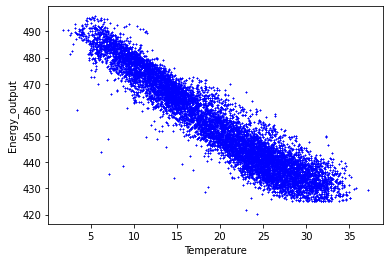

In [112]:
#print scatterplot for Temperature vs Energy_output
scatter_plot = plant.plot.scatter('Temperature','Energy_output',color = 'b', s=1, marker = "x")

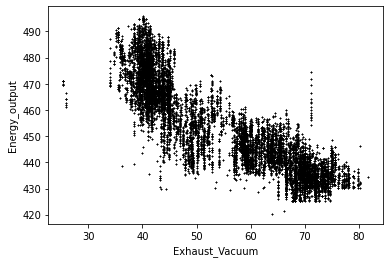

In [113]:
#print scatterplot for Exhaust_Vacuum vs Energy_output
scatter_plot = plant.plot.scatter('Exhaust_Vacuum','Energy_output',color = 'k', s=1, marker = "x")

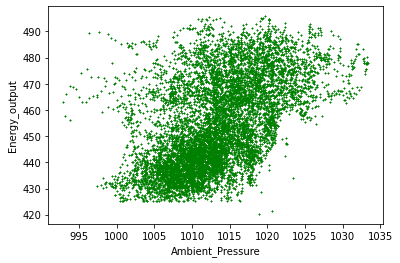

In [114]:
#print scatterplot for Ambient_Pressure vs Energy_output
scatter_plot = plant.plot.scatter('Ambient_Pressure','Energy_output',color = 'g', s=1, marker = "x")

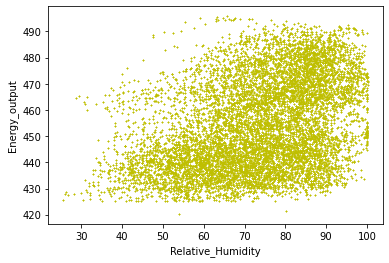

In [115]:
#print scatterplot for Relative_Humidity vs Energy_output
scatter_plot = plant.plot.scatter('Relative_Humidity','Energy_output',color = 'y', s=1, marker = "x")

Though the scatter plot, we can see a clear negative coorelation between temperature and Energy output. and a clear possitive correlation between Exhaust_Vacuum and Energy_output. However, although there is some positive correlation between Ambient_Pressure and Energy_output. Relative humanity looks like a bad indicator. 

For a safer check, I can use either Correlation Matrix plots or heat maps to see their coorelation values among variables. But in this data set, these four scatterplot is clear enough for showing correlations. I decided not to use other methods. And I want to focus on both clear indicators (Temperature and Exhaust Vacuum.)

## Part 3 Regression Model Construction & Evaluation: ##
Based on this exploratory data analysis, then I built the model for testing.
Firstly I would like to see how normal indicator perform like, and then I built model based on good indicators (temperature and Exhaust_Vacuum) from EDA. And finally I built case based on the complete model.



In [0]:
# set up some library and basic model
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split


#set explanatory variable to X  
X = plant[['Temperature','Ambient_Pressure','Relative_Humidity','Exhaust_Vacuum']]
# give  variable to y
y = plant['Energy_output']
# Now split the data into training and testing subsets. 
# We'll set aside 20% of the data for testing purposes;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

Then check the setup

In [126]:
# show first five rows of X_train
X_train.head()

,Temperature,Ambient_Pressure,Relative_Humidity,Exhaust_Vacuum
2711,31.11,1002.37,41.56,69.05
5538,9.27,1010.79,79.56,39.64
508,17.35,1014.62,74.16,42.86
3512,22.94,1008.25,73.45,61.50
7585,25.14,1017.91,53.30,60.29


## K-fold

For the chosen k value, I want to focus on 5 fold and 10 fold for their low bias and modest variance.

## Model 1: normal indicator Model (Ambient_Pressure and Relative_Humidity)

In [0]:
# create a new dataframe containing only the 'Ambient_Pressure and Relative_Humidity variables (our explanatory variables for the linear
# regression model)
newX_train = X_train[['Ambient_Pressure','Relative_Humidity']].copy()



In [135]:

# Define a linear regression model
model = LinearRegression()

# fit the model using 5-fold cross validation
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy 
print (scores)

# use np.mean to get the average scores
print("average socre for model1:",np.mean(scores))
print()

[0.38924932 0.40253871 0.34882946 0.38072653 0.38844573]
average socre for model1: 0.3819579488434063



Then we try 10 fold

In [136]:
#K choose 10
# Define a linear regression model
model = LinearRegression()

# fit the model using 10-fold cross validation
scores = cross_val_score(model, newX_train, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

# use np.mean to get the average scores
print("average socre for model1:",np.mean(scores))

[0.39371373 0.38431081 0.40051443 0.40404532 0.35237897 0.34676257
 0.38378404 0.37698979 0.38844258 0.3868843 ]
average socre for model1: 0.38178265110197857


Model 1 is definitely not good for a below 40% precision

## Model 2: good indicator Model (Temperature and Exhaust_Vacuum)

In [140]:
# Define a linear regression model
model = LinearRegression()
# create new datafram X2  
X2 = X_train[['Temperature', 'Exhaust_Vacuum']]
# fit the model using 5-fold cross validation 
scores = cross_val_score(model, X2, y_train, cv=5)

print(scores)
# use np.mean to get the average scores
print("average socre for model2:",np.mean(scores))


[0.91389525 0.91813401 0.92364316 0.90838977 0.91618594]
average socre for model1: 0.9160496254904507


Then we try 10 fold

In [141]:
# Define a linear regression model
model = LinearRegression()
# create new datafram X2
X2 = X_train[['Temperature', 'Exhaust_Vacuum']]
# fit the model using 5-fold cross validation with variables T and V
scores = cross_val_score(model, X2, y_train, cv=10)

print(scores)
# use np.mean to get the average scores
print("average socre for model2:",np.mean(scores))


[0.91336821 0.91449313 0.91481492 0.92137113 0.92783545 0.9198106
 0.90759006 0.90916312 0.9185441  0.91365798]
average socre for model2: 0.9160648688529409


Normally, we can call this 91.6% accuracy good enough. 
Finally, we build a complete model

## Model 3: complete Model 

In [142]:
# Define a linear regression model
model = LinearRegression()
# create new datafram X3 for complete model
X3 = X_train[['Temperature', 'Exhaust_Vacuum','Ambient_Pressure','Relative_Humidity']]
# fit the model using 5-fold cross validation 
scores = cross_val_score(model, X3, y_train, cv=5)

print(scores)
# use np.mean to get the average scores
print("average socre for model3:",np.mean(scores))


[0.92661916 0.93221968 0.93594576 0.92275381 0.92720045]
average socre for model3: 0.9289477726652141


Then we try 10 fold

In [143]:
# 10 fold
scores = cross_val_score(model, X3, y_train, cv=10)
#print accauracy for k fold validation
print(scores)
# use np.mean to get the average scores
print("average socre for model3:",np.mean(scores))


[0.92615809 0.92712542 0.92845487 0.93581368 0.9381034  0.93404428
 0.9223903  0.92310602 0.92662276 0.92767234]
average socre for model3: 0.9289491154310477


Based on that, we can see a bit improvement from model 2 to model 3. The accuracy increased from around 91% to 92.9%

## Part 4 Conclusion: ##

Based on this analysis and the regression model, I can say that temperature and Exhaust_Vacuum are most important indicator relating to Energy output. The model give 91.6% accuracy for K fold cross validation.
And Complete Model can give an accuracy of 92.89%.
In this size of data